<a href="https://colab.research.google.com/github/Bhanuka-Anjana/EE5253_2023_Code_Group91_ML_Project/blob/main/EE5253_2023_Code_Group91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⬛**Advertisement Clicking Prediction using Machine Learning**
⏩ Group No. : 91

⏩ Contributors :

>  * Anjana G.W.B.       : EG/2020/3822


> * Balasooriya B.A.L.M   : EG/2020/3838

---









# Importing Libraries & Data Set


> Link for Original Data set from Keggle - [Click Here](https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad)





In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing Dataset
train = pd.read_csv('sample_data/advertising.csv')
df=train.copy()

# Data Inspection and Visualization of the data set

In [ ]:
df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
#Check shape of dataset
rows, cols = df.shape
print("Total no. of columns : ", cols)
print("Total no. of roes : ", rows)

Total no. of columns :  10
Total no. of roes :  1000


In [ ]:
#Summary of the numerical values of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
#Seperate categorical features
categorical_features = df.select_dtypes(include = ['object']).columns
print(categorical_features)
df[categorical_features].describe()

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')


,Ad Topic Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,1000
top,Cloned 5thgeneration orchestration,Lisamouth,France,2016-03-27 00:53:11
freq,1,3,9,1


In [ ]:
# Seperate numerical features
numerical_features = df.drop(columns=categorical_features)
numerical_features.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: >

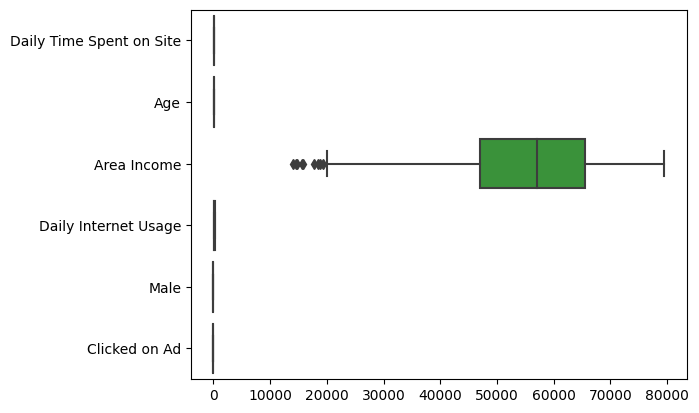

In [ ]:
sns.boxplot(data=numerical_features, orient='h')

# Feature Selction & Data Preprocessing



> According to the keggle visualization **Ad Topic Line** feature has 1000 unique values over 1000 data set. As same as **City** feature.


> Therefore, we can drop these columns because these data for the each column is unique to each other and it will reduce the accuracy of the ML model





In [ ]:
df = df.drop(columns=['Ad Topic Line','City'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
#Convert "Timestamp" in to date-time format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extracting year, month, day, hour, minute, and second
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

#Creates Weekday feature column with sunday as 6 and monday as 0
df["Weekday"] = df['Timestamp'].dt.dayofweek

#drop the country feature
df = df.drop(columns=['Timestamp'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Year,Month,Day,Hour,Minute,Weekday
0,68.95,35,61833.90,256.09,0,Tunisia,0,2016,3,27,0,53,6
1,80.23,31,68441.85,193.77,1,Nauru,0,2016,4,4,1,39,0
2,69.47,26,59785.94,236.50,0,San Marino,0,2016,3,13,20,35,6
3,74.15,29,54806.18,245.89,1,Italy,0,2016,1,10,2,31,6
4,68.37,35,73889.99,225.58,0,Iceland,0,2016,6,3,3,36,4


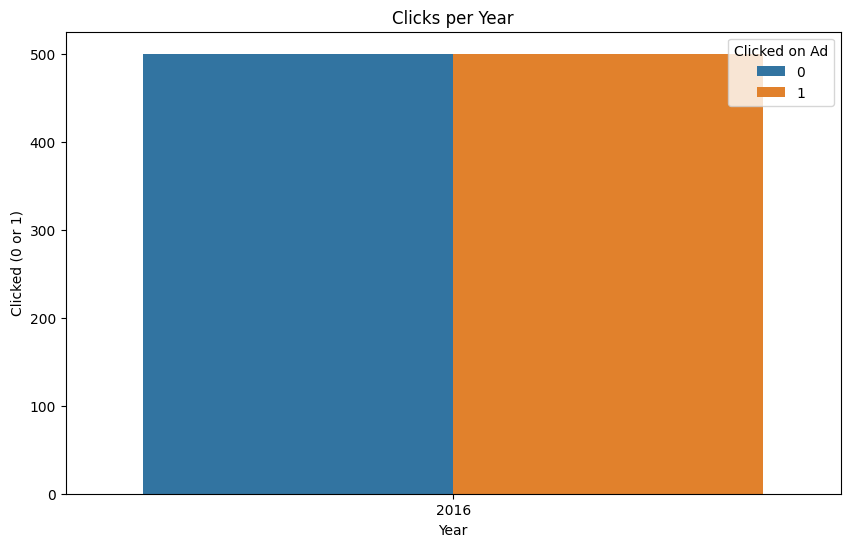

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Year", hue="Clicked on Ad", data=df)
plt.xlabel('Year')
plt.ylabel('Clicked (0 or 1)')
plt.title('Clicks per Year')
plt.show()

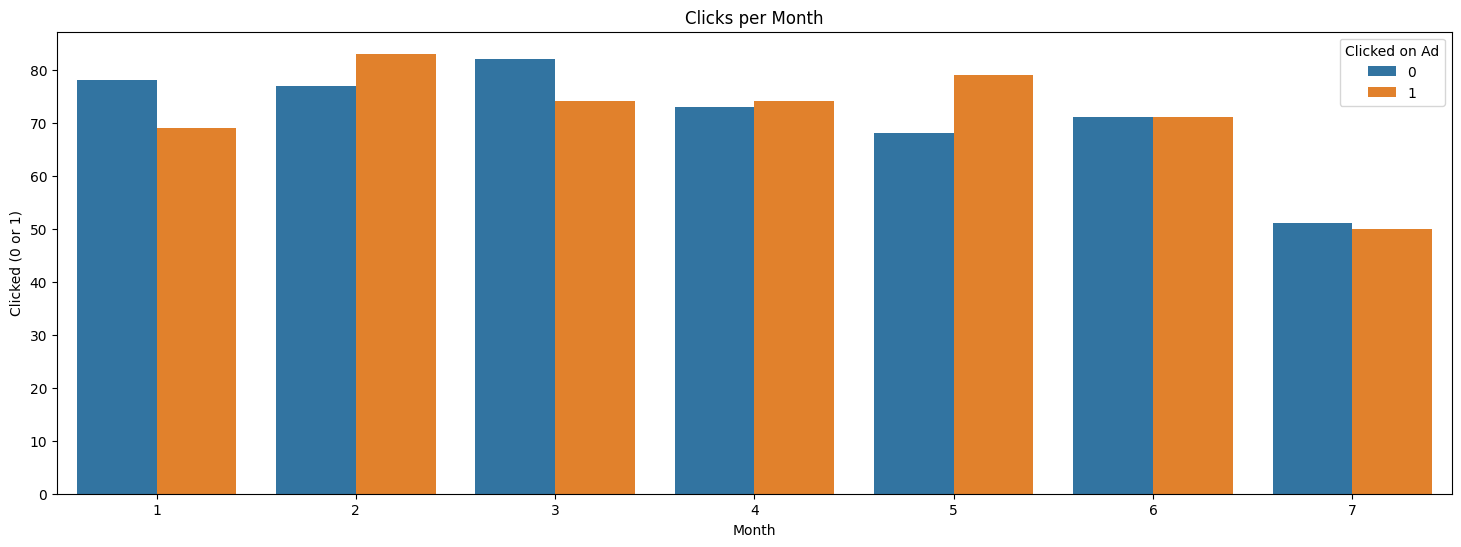

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(x="Month", hue="Clicked on Ad", data=df)
plt.xlabel('Month')
plt.ylabel('Clicked (0 or 1)')
plt.title('Clicks per Month')
plt.show()

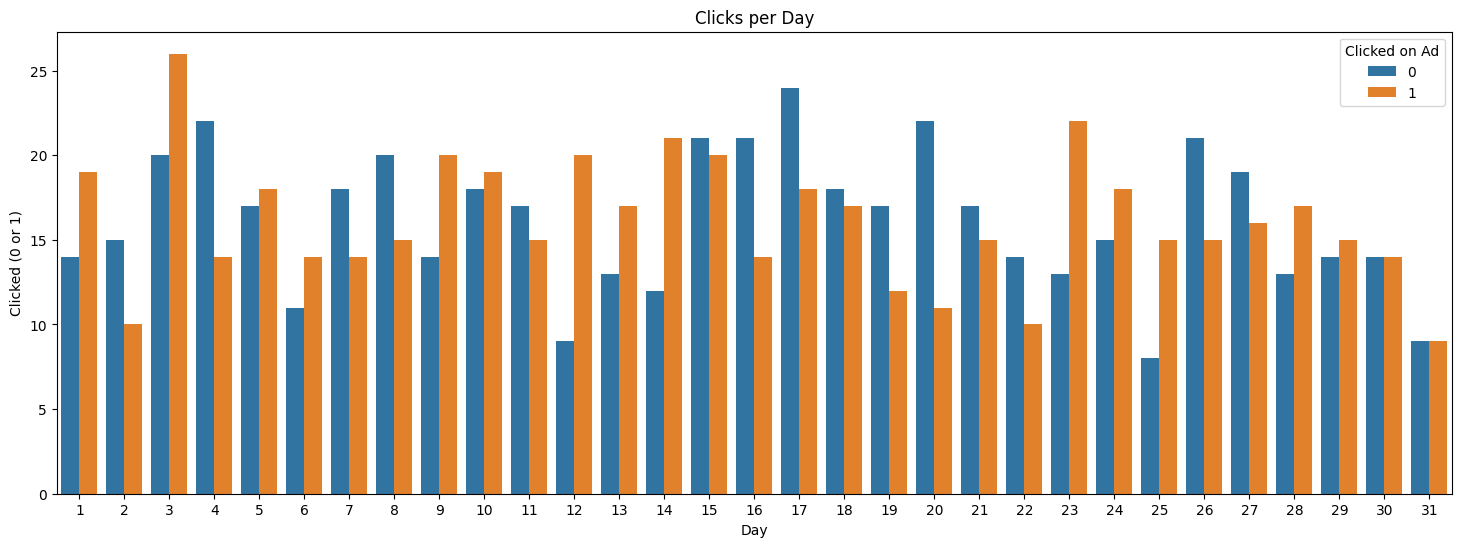

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(x="Day", hue="Clicked on Ad", data=df)
plt.xlabel('Day')
plt.ylabel('Clicked (0 or 1)')
plt.title('Clicks per Day')
plt.show()

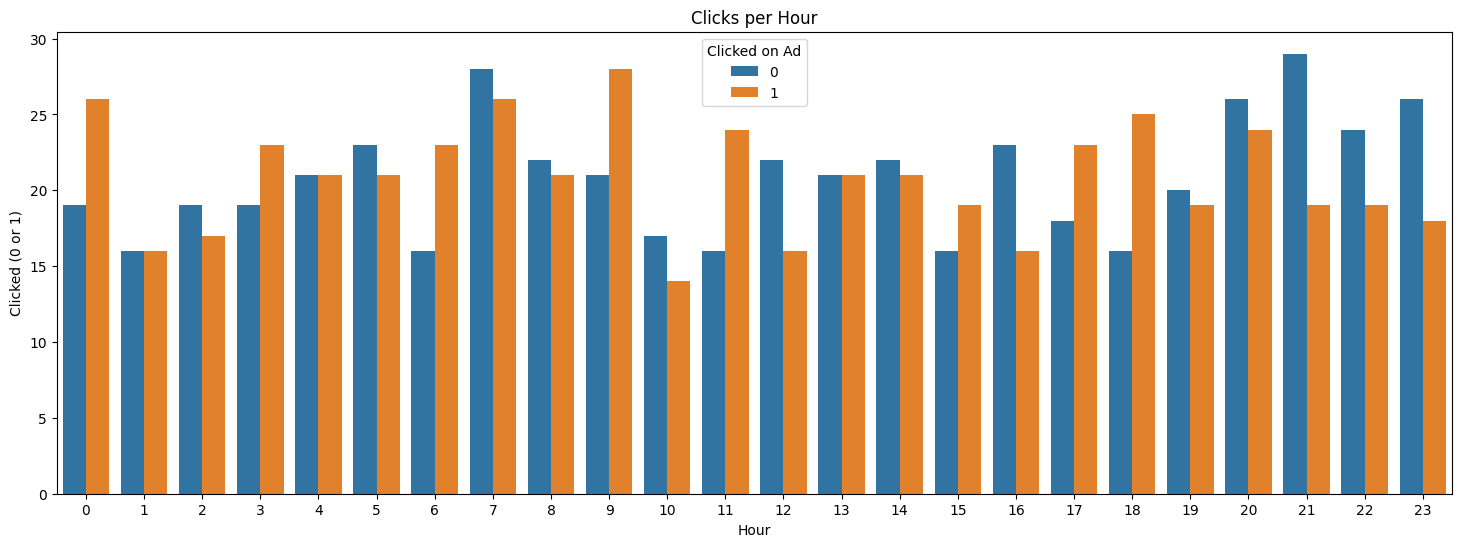

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(x="Hour", hue="Clicked on Ad", data=df)
plt.xlabel('Hour')
plt.ylabel('Clicked (0 or 1)')
plt.title('Clicks per Hour')
plt.show()

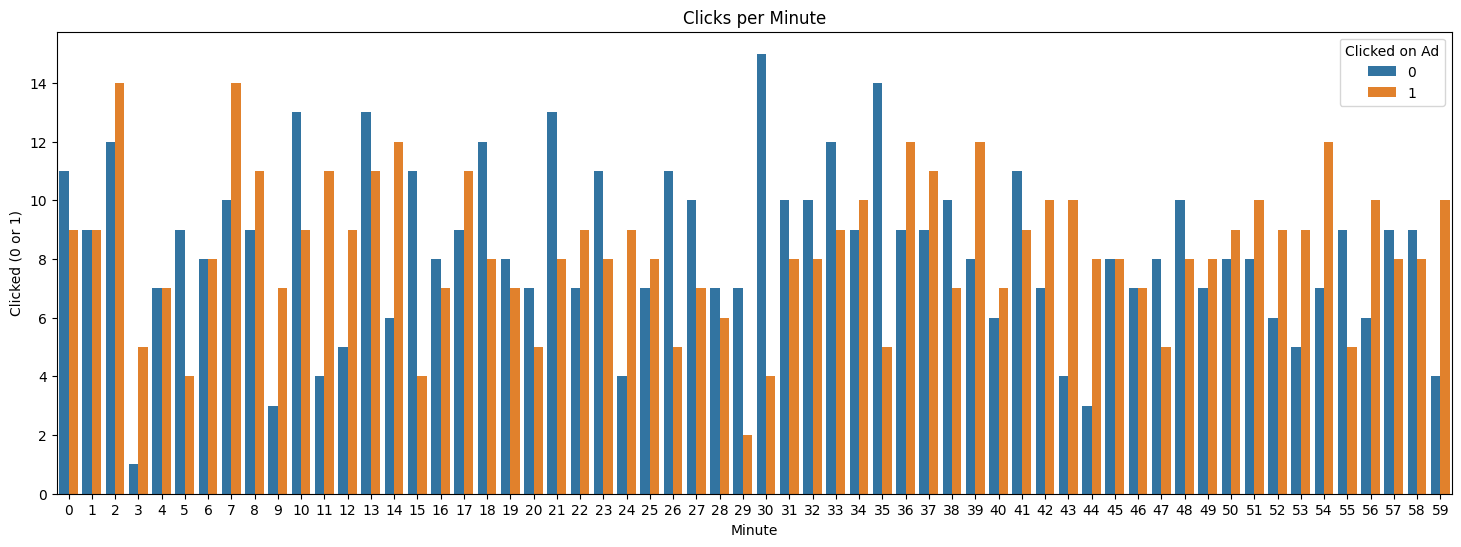

In [ ]:
plt.figure(figsize=(18, 6))
sns.countplot(x="Minute", hue="Clicked on Ad", data=df)
plt.xlabel('Minute')
plt.ylabel('Clicked (0 or 1)')
plt.title('Clicks per Minute')
plt.show()

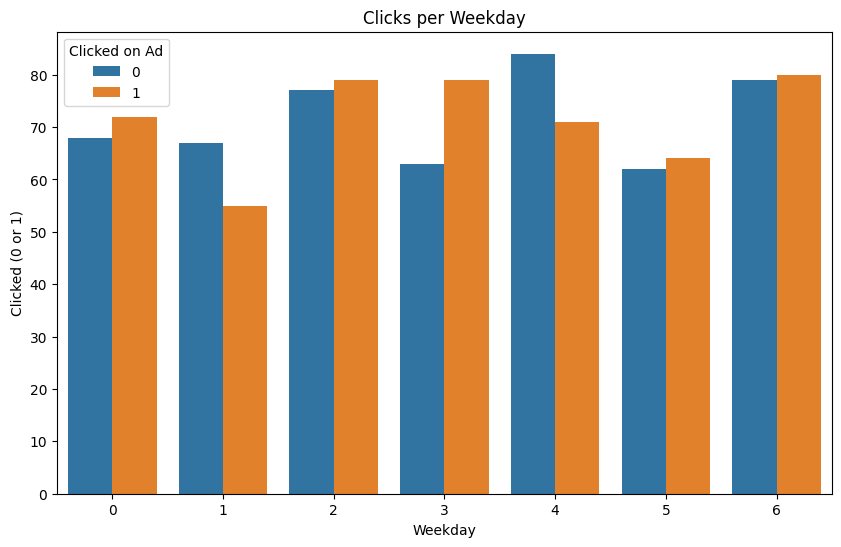

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Weekday", hue="Clicked on Ad", data=df)
plt.xlabel('Weekday')
plt.ylabel('Clicked (0 or 1)')
plt.title('Clicks per Weekday')
plt.show()
#0 --> Sunday
#6 -->Saturday

In [ ]:
df[['Year','Month','Day','Hour','Minute','Weekday']].info()
df[['Year','Month','Day','Hour','Minute','Weekday']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     1000 non-null   int64
 1   Month    1000 non-null   int64
 2   Day      1000 non-null   int64
 3   Hour     1000 non-null   int64
 4   Minute   1000 non-null   int64
 5   Weekday  1000 non-null   int64
dtypes: int64(6)
memory usage: 47.0 KB


,Year,Month,Day,Hour,Minute,Weekday
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2016.0,3.817000,15.484000,11.660000,29.054000,3.064000
std,0.0,1.926973,8.734073,6.960952,17.249134,1.998474
min,2016.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2016.0,2.000000,8.000000,6.000000,14.000000,1.000000
50%,2016.0,4.000000,15.000000,12.000000,30.000000,3.000000
75%,2016.0,5.000000,23.000000,18.000000,43.000000,5.000000
max,2016.0,7.000000,31.000000,23.000000,59.000000,6.000000


In [ ]:
df = df.drop(columns=['Year']) #unique for all data points
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Month,Day,Hour,Minute,Weekday
0,68.95,35,61833.90,256.09,0,Tunisia,0,3,27,0,53,6
1,80.23,31,68441.85,193.77,1,Nauru,0,4,4,1,39,0
2,69.47,26,59785.94,236.50,0,San Marino,0,3,13,20,35,6
3,74.15,29,54806.18,245.89,1,Italy,0,1,10,2,31,6
4,68.37,35,73889.99,225.58,0,Iceland,0,6,3,3,36,4


In [ ]:
# labeling the unique countries for encoding
unique_countries = df['Country'].unique()
np.set_printoptions(threshold=np.inf)
encoded_countries = {}

for unique_country in unique_countries:
    encoded_countries[unique_country] = np.where(unique_countries == unique_country)[0][0]
print(type(encoded_countries))
print(encoded_countries)

# save encoded_countries as excel file for future use
df_countries = pd.DataFrame.from_dict(encoded_countries, orient='index')
df_countries.to_excel('encoded_countries.xlsx')

#Map the country feature into new feature called 'Country_Num'
df['Country_Num'] = df['Country'].map(encoded_countries)

#drop the country feature
df = df.drop(columns=['Country'])
df.head(10)

<class 'dict'>
{'Tunisia': 0, 'Nauru': 1, 'San Marino': 2, 'Italy': 3, 'Iceland': 4, 'Norway': 5, 'Myanmar': 6, 'Australia': 7, 'Grenada': 8, 'Ghana': 9, 'Qatar': 10, 'Burundi': 11, 'Egypt': 12, 'Bosnia and Herzegovina': 13, 'Barbados': 14, 'Spain': 15, 'Palestinian Territory': 16, 'Afghanistan': 17, 'British Indian Ocean Territory (Chagos Archipelago)': 18, 'Russian Federation': 19, 'Cameroon': 20, 'Korea': 21, 'Tokelau': 22, 'Monaco': 23, 'Tuvalu': 24, 'Greece': 25, 'British Virgin Islands': 26, 'Bouvet Island (Bouvetoya)': 27, 'Peru': 28, 'Aruba': 29, 'Maldives': 30, 'Senegal': 31, 'Dominica': 32, 'Luxembourg': 33, 'Montenegro': 34, 'Ukraine': 35, 'Saint Helena': 36, 'Liberia': 37, 'Turkmenistan': 38, 'Niger': 39, 'Sri Lanka': 40, 'Trinidad and Tobago': 41, 'United Kingdom': 42, 'Guinea-Bissau': 43, 'Micronesia': 44, 'Turkey': 45, 'Croatia': 46, 'Israel': 47, 'Svalbard & Jan Mayen Islands': 48, 'Azerbaijan': 49, 'Iran': 50, 'Saint Vincent and the Grenadines': 51, 'Bulgaria': 52, 'Ch

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Minute,Weekday,Country_Num
0,68.95,35,61833.90,256.09,0,0,3,27,0,53,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,1,39,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,20,35,6,2
3,74.15,29,54806.18,245.89,1,0,1,10,2,31,6,3
4,68.37,35,73889.99,225.58,0,0,6,3,3,36,4,4
5,59.99,23,59761.56,226.74,1,0,5,19,14,30,3,5
6,88.91,33,53852.85,208.36,0,0,1,28,20,59,3,6
7,66.00,48,24593.33,131.76,1,1,3,7,1,40,0,7
8,74.53,30,68862.00,221.51,1,0,4,18,9,33,0,8
9,69.88,20,55642.32,183.82,1,0,7,11,1,42,0,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Day                       1000 non-null   int64  
 8   Hour                      1000 non-null   int64  
 9   Minute                    1000 non-null   int64  
 10  Weekday                   1000 non-null   int64  
 11  Country_Num               1000 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 93.9 KB


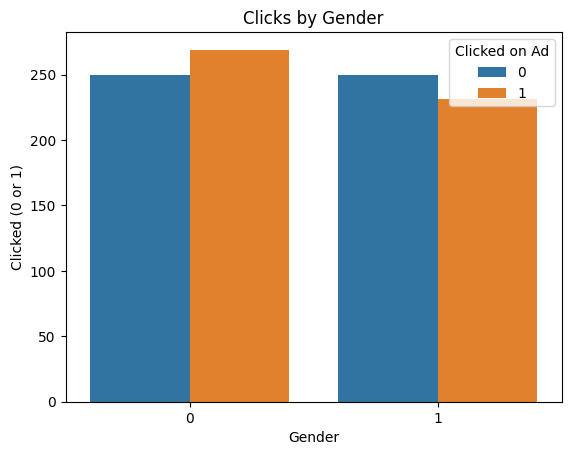

In [ ]:
sns.countplot(x="Male",hue = 'Clicked on Ad',data=df)
plt.xlabel('Gender')
plt.ylabel('Clicked (0 or 1)')
plt.title('Clicks by Gender')
plt.show()

In [ ]:
#Check shape of dataset
rows, cols = df.shape
print("Total no. of columns : ", cols)
print("Total no. of roes : ", rows)
df.describe()

Total no. of columns :  12
Total no. of roes :  1000


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Minute,Weekday,Country_Num
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,3.817000,15.484000,11.660000,29.054000,3.064000,108.916000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,1.926973,8.734073,6.960952,17.249134,1.998474,64.958946
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,2.000000,8.000000,6.000000,14.000000,1.000000,52.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,4.000000,15.000000,12.000000,30.000000,3.000000,107.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,5.000000,23.000000,18.000000,43.000000,5.000000,162.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,7.000000,31.000000,23.000000,59.000000,6.000000,236.000000


In [ ]:
# Check for null values
df.isnull().sum()


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Clicked on Ad               0
Month                       0
Day                         0
Hour                        0
Minute                      0
Weekday                     0
Country_Num                 0
dtype: int64

In [ ]:
#Description of the co-relation with features
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Minute,Weekday,Country_Num
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117,-0.010920,-0.011217,0.000895,-0.021815,0.018336,0.028742
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531,0.023689,-0.038162,-0.049905,-0.030467,0.013593,-0.015244
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255,-0.050216,-0.026523,0.034573,0.001158,0.013879,0.046204
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539,0.017530,-0.012531,0.074347,0.010605,0.009035,0.026959
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027,0.005220,-0.013253,0.058552,0.057700,-0.038861,0.041104
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000,0.016095,-0.005269,-0.047431,0.022969,0.002003,-0.024243
Month,-0.010920,0.023689,-0.050216,0.017530,0.005220,0.016095,1.000000,-0.017274,-0.013748,-0.089899,-0.020090,0.009305
Day,-0.011217,-0.038162,-0.026523,-0.012531,-0.013253,-0.005269,-0.017274,1.000000,-0.017064,0.037559,0.041235,0.003865
Hour,0.000895,-0.049905,0.034573,0.074347,0.058552,-0.047431,-0.013748,-0.017064,1.000000,-0.021106,0.007034,-0.014479
Minute,-0.021815,-0.030467,0.001158,0.010605,0.057700,0.022969,-0.089899,0.037559,-0.021106,1.000000,0.001264,0.005900


<Axes: >

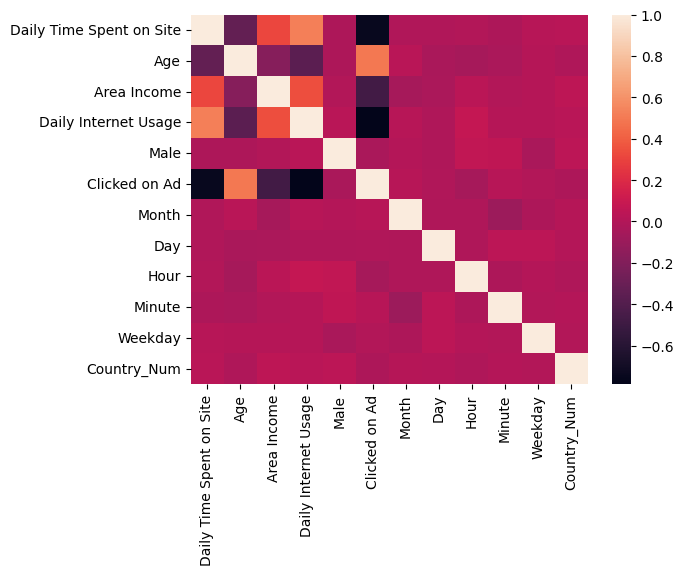

In [ ]:
sns.heatmap(data=df.corr())

In [ ]:
# Check for duplicates
duplicates = df.duplicated()
print("Count of duplicates : ",duplicates.sum())
print("Duplicate Rows:")
print(df[duplicates])

Count of duplicates :  0
Duplicate Rows:
Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Male, Clicked on Ad, Month, Day, Hour, Minute, Weekday, Country_Num]
Index: []


# Model Training & Hyper-parameter Tuning

In [ ]:
# Seperate the features and target from the dataset.
x = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

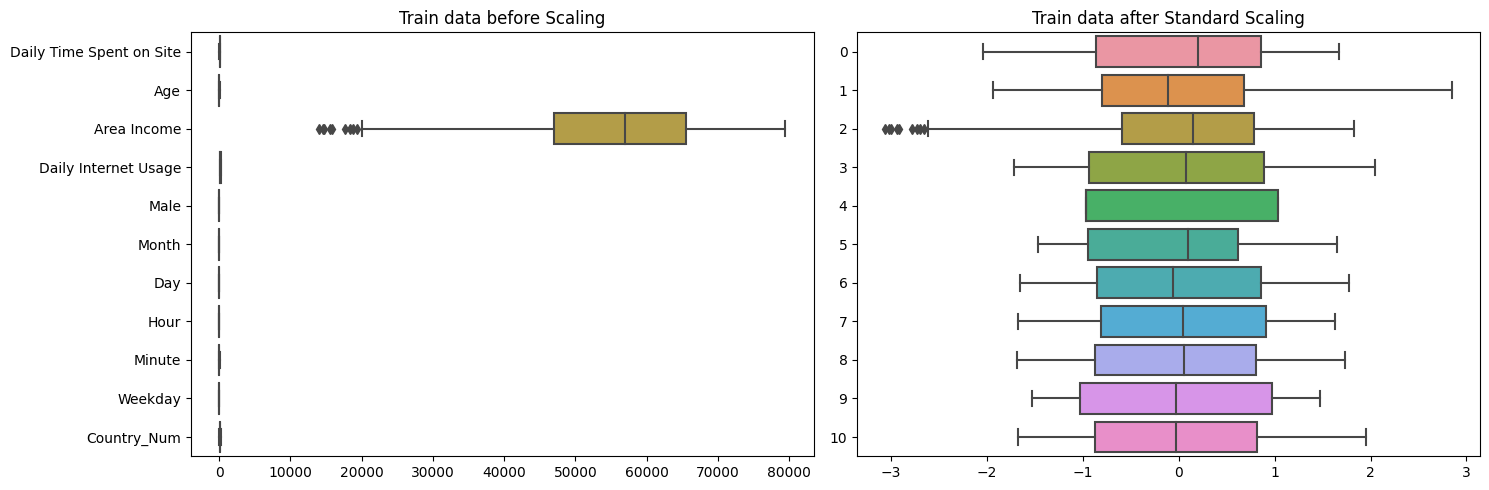

In [ ]:
# Scale the data using scikit-learn standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Create a figure to hold the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(ax=axes[0], data=x, orient='h')
axes[0].set_title('Train data before Scaling')
sns.boxplot(ax=axes[1], data=x_scaled, orient='h')
axes[1].set_title('Train data after Standard Scaling')
plt.tight_layout()
plt.show()

In [ ]:
#Removing the outliers in 'Area Income' feature
q1 = df['Area Income'].quantile(0.25)
q3 = df['Area Income'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

outliers = df[(df['Area Income']<lower_bound) | (df['Area Income']>upper_bound)]
print(outliers)

df_no_outlier = df[(df['Area Income']>=lower_bound) & (df['Area Income']<=upper_bound)]

     Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male  \
135                     49.89   39     17709.98                160.03     1   
410                     48.09   33     19345.36                180.42     0   
510                     57.86   30     18819.34                166.86     0   
640                     64.63   45     15598.29                158.80     1   
665                     58.05   32     15879.10                195.54     1   
692                     66.26   47     14548.06                179.04     1   
768                     68.58   41     13996.50                171.54     1   
778                     52.67   44     14775.50                191.26     0   
952                     62.79   36     18368.57                231.87     1   

     Clicked on Ad  Month  Day  Hour  Minute  Weekday  Country_Num  
135              1      4   16    12       9        5          101  
410              1      5   28    12      38        5          201  
51

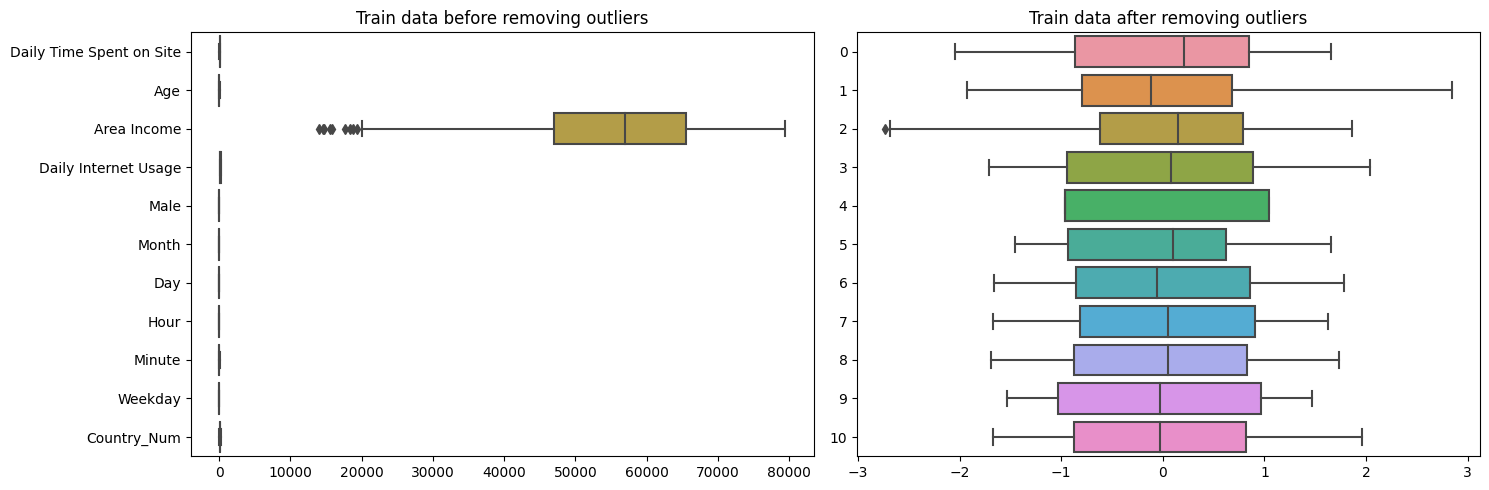

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seperate the features and target from the dataset after removing outliers.
x_no_outliers = df_no_outlier.drop(columns=['Clicked on Ad'])
y_no_outliers = df_no_outlier['Clicked on Ad']

# Scale the data using scikit-learn standard scaler
scaler = StandardScaler()
scaler.fit(x_no_outliers)
x_no_outliers_scaled = scaler.transform(x_no_outliers)

#Create a figure to hold the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(ax=axes[0], data=x, orient='h')
axes[0].set_title('Train data before removing outliers')
sns.boxplot(ax=axes[1], data=x_no_outliers_scaled, orient='h')
axes[1].set_title('Train data after removing outliers')
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_no_outliers_scaled,y_no_outliers, test_size=0.2, random_state=42)
# Print the train and test set sizes
print("train feature data size : ",x_train.shape)
print("test feature data size : ",x_test.shape)
print("train target data size : ",y_train.shape)
print("test target data size : ",y_test.shape)

train feature data size :  (792, 11)
test feature data size :  (199, 11)
train target data size :  (792,)
test target data size :  (199,)


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

parameters = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [100,50, 10, 1.0, 0.1, 0.01],
            'kernel': ['poly', 'rbf', 'sigmoid','linear']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
            'C': [100,50, 10, 1.0, 0.1, 0.01],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear']
        }
    }
}

scores = []

for model_name, mp in parameters.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

test_01_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
test_01_score

,model,best_score,best_params
0,svm,0.968402,"{'C': 1.0, 'kernel': 'sigmoid'}"
1,logistic_regression,0.968418,"{'C': 0.1, 'solver': 'newton-cg'}"


In [ ]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
#Train Logistic Model with best hyper-parameters
model_test_1_logis = LogisticRegression(C=0.1,solver='newton-cg')
model_test_1_logis.fit(x_train,y_train)
y_pred_logis = model_test_1_logis.predict(x_test)

#Report of the model
print(classification_report(y_test,y_pred_logis))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.98      0.97      0.97        96

    accuracy                           0.97       199
   macro avg       0.98      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199



In [ ]:
#Train Logistic Model with best hyper-parameters
model_test_1_svm = svm.SVC(C=1,kernel='sigmoid',gamma='auto')
model_test_1_svm.fit(x_train,y_train)
y_pred_svm = model_test_1_svm.predict(x_test)

#Report of the model
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       103
           1       0.98      0.96      0.97        96

    accuracy                           0.97       199
   macro avg       0.97      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199



In [ ]:
def plot_performe_matrix_graphs(y_test, y_pred_logis,y_pred_svm):
  # Compute ROC-AUC score
  roc_auc_lr = roc_auc_score(y_test, y_pred_logis)
  roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
  print('ROC-AUC for Logistic Regression: ' ,roc_auc_lr)
  print('ROC-AUC for SVM: ', roc_auc_svm)

  # Plot ROC curve
  fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_logis)
  fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)

  plt.figure(figsize=(12, 6))

  # ROC Curve
  plt.subplot(1, 2, 1)
  plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
  plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
  plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend()

  # Compute precision-recall AUC
  precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_logis)
  precision_svm, recall_svm, _ = precision_recall_curve(y_test, y_pred_svm)

  pr_auc_lr = auc(recall_lr, precision_lr)
  pr_auc_svm = auc(recall_svm, precision_svm)

  # Precision-Recall Curve
  plt.subplot(1, 2, 2)
  plt.plot(recall_lr, precision_lr, label=f'Logistic Regression (AUC-PR = {pr_auc_lr:.2f})')
  plt.plot(recall_svm, precision_svm, label=f'SVM (AUC-PR = {pr_auc_svm:.2f})')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.legend()

  plt.tight_layout()
  plt.show()


ROC-AUC for Logistic Regression:  0.9746662621359223
ROC-AUC for SVM:  0.9694579288025891


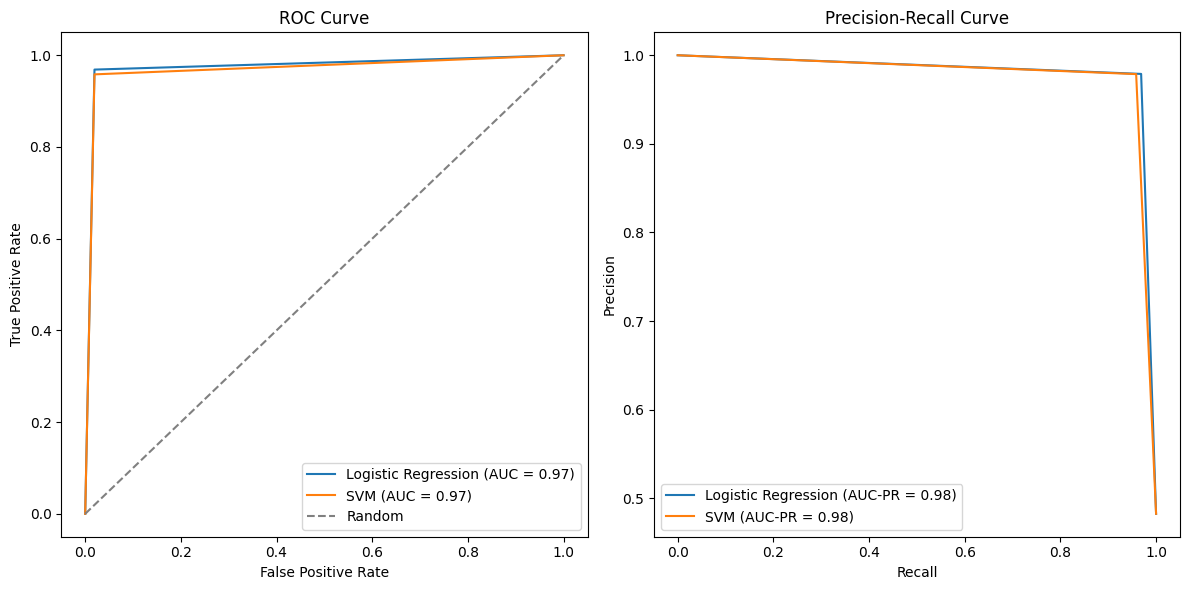

In [ ]:
plot_performe_matrix_graphs(y_test,y_pred_logis,y_pred_svm)

In [ ]:
df_no_outlier.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour,Minute,Weekday,Country_Num
Daily Time Spent on Site,1.000000,-0.332851,0.313452,0.520032,-0.019975,-0.749120,-0.009671,-0.009546,0.000651,-0.022162,0.020883,0.029859
Age,-0.332851,1.000000,-0.181772,-0.367954,-0.024167,0.493294,0.021924,-0.039426,-0.049071,-0.029060,0.014979,-0.013046
Area Income,0.313452,-0.181772,1.000000,0.352213,0.011995,-0.470211,-0.035793,-0.022374,0.038306,-0.011075,0.016272,0.049859
Daily Internet Usage,0.520032,-0.367954,0.352213,1.000000,0.027740,-0.791344,0.018480,-0.015161,0.073183,0.010198,0.011906,0.028171
Male,-0.019975,-0.024167,0.011995,0.027740,1.000000,-0.041786,0.005273,-0.013398,0.058077,0.062704,-0.037138,0.043137
Clicked on Ad,-0.749120,0.493294,-0.470211,-0.791344,-0.041786,1.000000,0.010612,-0.007257,-0.048663,0.027323,0.001295,-0.025030
Month,-0.009671,0.021924,-0.035793,0.018480,0.005273,0.010612,1.000000,-0.016396,-0.014390,-0.084750,-0.020983,0.008766
Day,-0.009546,-0.039426,-0.022374,-0.015161,-0.013398,-0.007257,-0.016396,1.000000,-0.019974,0.036391,0.045021,0.006014
Hour,0.000651,-0.049071,0.038306,0.073183,0.058077,-0.048663,-0.014390,-0.019974,1.000000,-0.019906,0.012068,-0.014606
Minute,-0.022162,-0.029060,-0.011075,0.010198,0.062704,0.027323,-0.084750,0.036391,-0.019906,1.000000,0.001120,0.004654


<Axes: >

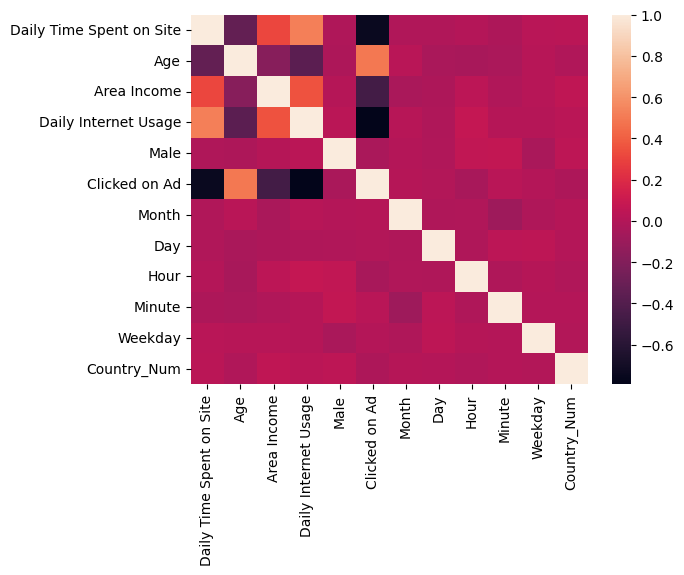

In [ ]:
sns.heatmap(df_no_outlier.corr())

In [ ]:
#Remove all low co-relational features
df_no_outlier = df_no_outlier.drop(columns=['Weekday','Day','Month','Male','Minute','Hour','Country_Num'])

# Seperate the features and target from the dataset after removing outliers.
x_no_outliers = df_no_outlier.drop(columns=['Clicked on Ad'])
y_no_outliers = df_no_outlier['Clicked on Ad']

#scaled using standard scaler
scaler = StandardScaler()
scaler.fit(x_no_outliers)
x_no_outliers_scaled = scaler.transform(x_no_outliers)


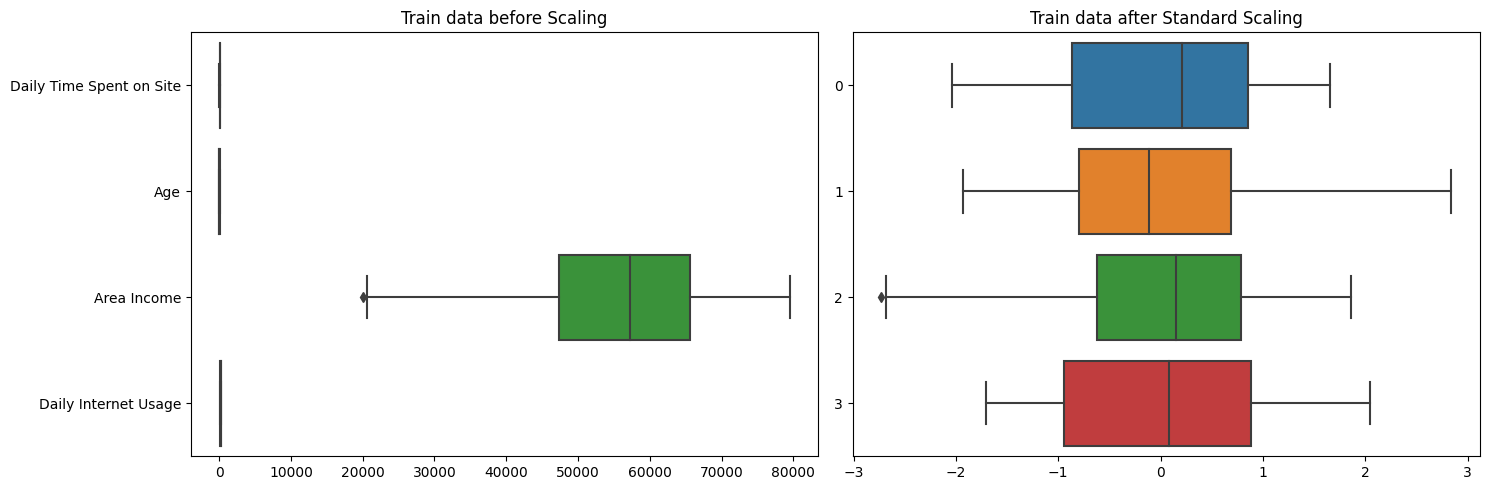

In [ ]:
#Create a figure to hold the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(ax=axes[0], data=x_no_outliers, orient='h')
axes[0].set_title('Train data before Scaling')
sns.boxplot(ax=axes[1], data=x_no_outliers_scaled, orient='h')
axes[1].set_title('Train data after Standard Scaling')
plt.tight_layout()
plt.show()

In [ ]:
#split the data set
x_train, x_test, y_train, y_test = train_test_split(x_no_outliers_scaled,y_no_outliers, test_size=0.2, random_state=42)

# Print the train and test set sizes
print("train feature data size : ",x_train.shape)
print("test feature data size : ",x_test.shape)
print("train target data size : ",y_train.shape)
print("test target data size : ",y_test.shape)

train feature data size :  (792, 4)
test feature data size :  (199, 4)
train target data size :  (792,)
test target data size :  (199,)


In [ ]:
scores = []

for model_name, mp in parameters.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

test_02_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
test_02_score

,model,best_score,best_params
0,svm,0.972184,"{'C': 0.1, 'kernel': 'rbf'}"
1,logistic_regression,0.969668,"{'C': 0.1, 'solver': 'newton-cg'}"


In [ ]:
#Train Logistic Model with best hyper-parameters
model_test_2_logis = LogisticRegression(C=0.1,solver='newton-cg')
model_test_2_logis.fit(x_train,y_train)
y_pred_logis = model_test_2_logis.predict(x_test)

#Report of the model
print(classification_report(y_test,y_pred_logis))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       103
           1       0.98      0.97      0.97        96

    accuracy                           0.97       199
   macro avg       0.98      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199



In [ ]:
#Train Logistic Model with best hyper-parameters
model_test_2_svm = svm.SVC(C=0.1,kernel='rbf',gamma='auto')
model_test_2_svm.fit(x_train,y_train)
y_pred_svm = model_test_2_svm.predict(x_test)

#Report of the model
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       103
           1       0.97      0.97      0.97        96

    accuracy                           0.97       199
   macro avg       0.97      0.97      0.97       199
weighted avg       0.97      0.97      0.97       199



ROC-AUC for Logistic Regression:  0.9746662621359223
ROC-AUC for SVM:  0.9698118932038835


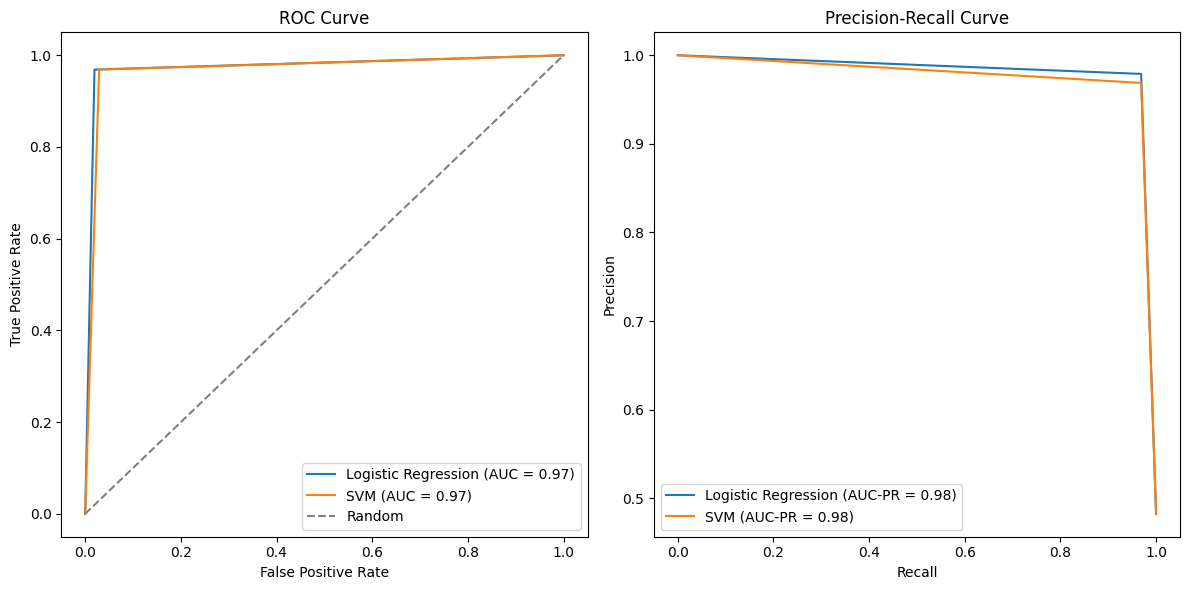

In [ ]:
plot_performe_matrix_graphs(y_test,y_pred_logis,y_pred_svm)